<h1>Importing Libraries</h1>

In [34]:
# Importing Required Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

<h1>Dataset Path</h1>

In [35]:
# Path for dataset
path=r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 3\Day 3\IceCreamSelling.csv'

<h1>Loading Dataset</h1>

In [36]:
# Loading Dataset
df=pd.read_csv(path)
print("Dataset:\n",df.head(10))

Dataset:
    Temperature  Ice Cream Sales
0    -4.662263        41.842986
1    -4.316559        34.661120
2    -4.213985        39.383001
3    -3.949661        37.539845
4    -3.578554        32.284531
5    -3.455712        30.001138
6    -3.108440        22.635401
7    -3.081303        25.365022
8    -2.672461        19.226970
9    -2.652287        20.279679


<h1>Histogram for numeric features</h1>

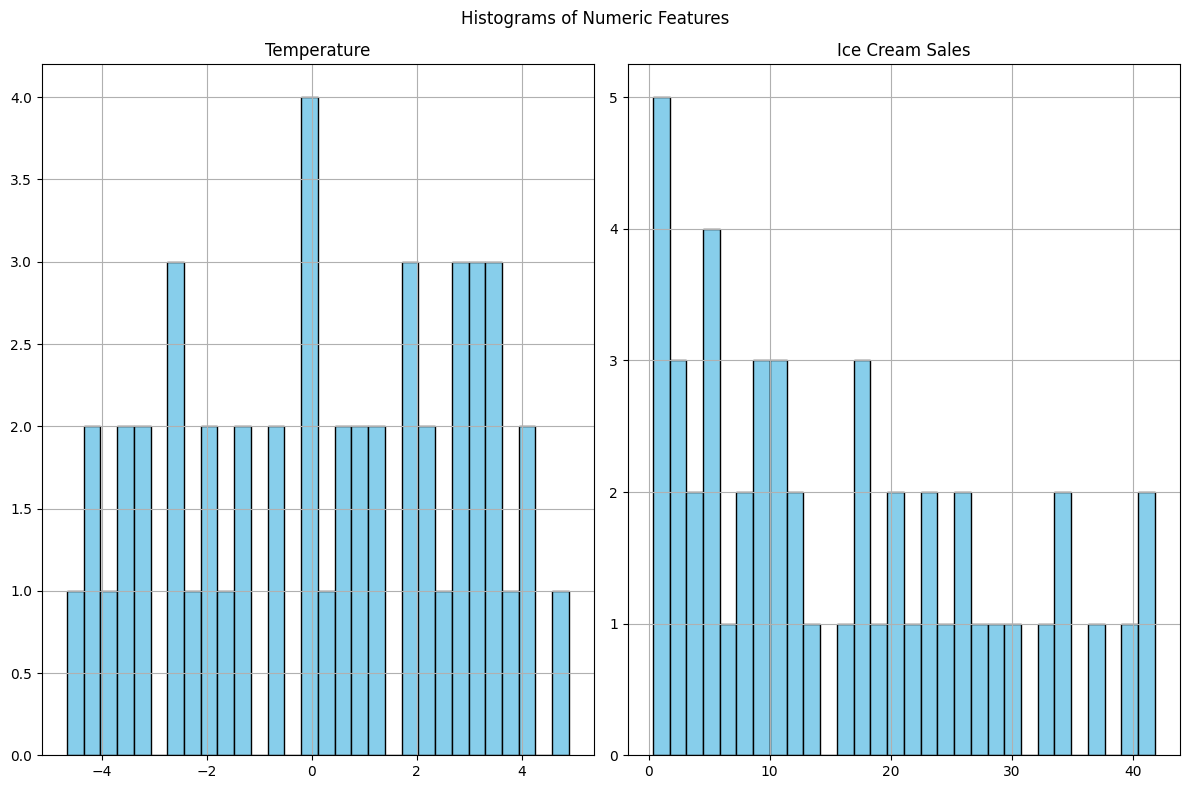

In [37]:
# Histogram for numeric features
df.hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

<h1>Box Plot for detectiing outliers</h1>

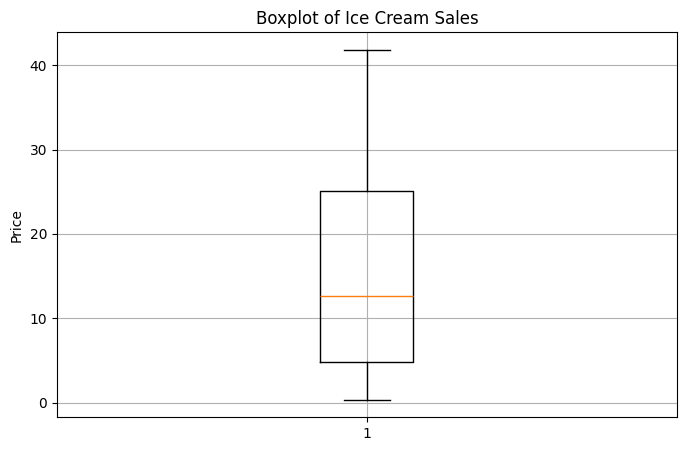

In [38]:
# Box Plot fordetection for detectiong  outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['Ice Cream Sales'])
plt.title('Boxplot of Ice Cream Sales')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<h1>Data Preprocessing</h1>

In [39]:
# Show total missing values per column
print(df.isnull().sum())
print(df[df.isnull().any(axis=1)])

Temperature        0
Ice Cream Sales    0
dtype: int64
Empty DataFrame
Columns: [Temperature, Ice Cream Sales]
Index: []


In [40]:
# Remove rows with any missing values
df = df.dropna()
df = df.fillna(df.mean(numeric_only=True))

In [41]:
# Duplicate rows
print(df[df.duplicated()])
df = df.drop_duplicates()

Empty DataFrame
Columns: [Temperature, Ice Cream Sales]
Index: []


In [42]:
#Reset indexing after cleaning
df = df.reset_index(drop=True)

In [43]:
print("Preprocessed Dataset : \n",df.head(10))

Preprocessed Dataset : 
    Temperature  Ice Cream Sales
0    -4.662263        41.842986
1    -4.316559        34.661120
2    -4.213985        39.383001
3    -3.949661        37.539845
4    -3.578554        32.284531
5    -3.455712        30.001138
6    -3.108440        22.635401
7    -3.081303        25.365022
8    -2.672461        19.226970
9    -2.652287        20.279679


In [44]:
# Coulmns in dataset
col=df.columns
print("Columns : ",col)

Columns :  Index(['Temperature', 'Ice Cream Sales'], dtype='object')


In [45]:
# number of Rows and Columns
rows,cols=df.shape
print("Rows : ",rows)
print("Columns : ",cols)

Rows :  49
Columns :  2


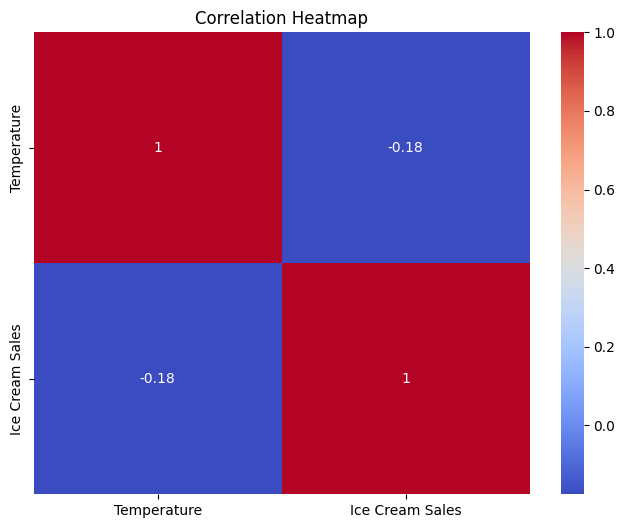

In [46]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# Generate polynomial features (degree = 3)
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X = poly_features.fit_transform(df[['Temperature']])
Y = df['Ice Cream Sales']

<h1>Spliting dataset for Training & Testing</h1>

In [48]:
# Splitting data for Training and Testing
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.3)

<h1>Polynomial Regression Model</h1>

In [49]:
# Loading Linear Regression Model
model = LinearRegression()

In [50]:
# Training Model
model.fit(X_Train,Y_Train)

LinearRegression()

In [51]:
# Making Prediction for Testing
Y_Predict=model.predict(X_Test)

<h1>Model Evaluation</h1>

In [52]:
# Evaluationg Model
mse = mean_squared_error(Y_Test, Y_Predict)   
r2 = r2_score(Y_Test, Y_Predict)

print("Mean Squared Error : ",mse)
print("R2 Square Error : ",r2)

Mean Squared Error :  8.05438159549428
R2 Square Error :  0.9174413998443427


<h1>Scatter Plot Between Actual and Predicted Proces</h1>

C:\Users\Doctor Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


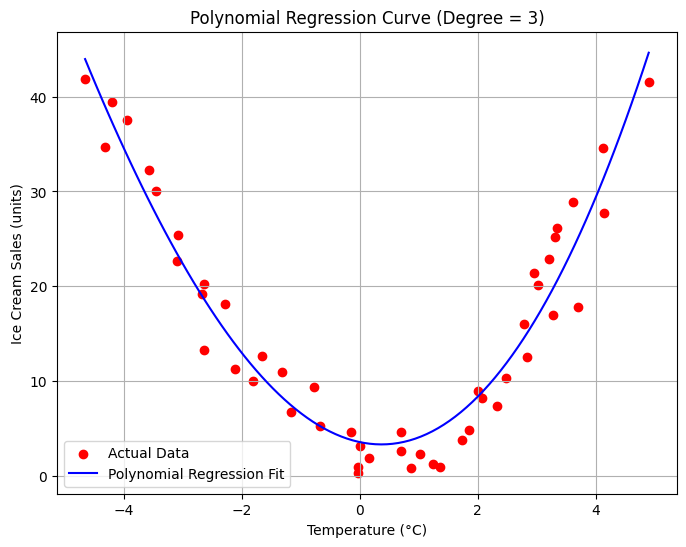

In [53]:
# Create smoother temperature values for plotting curve
X_plot = np.linspace(df['Temperature'].min(), df['Temperature'].max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
Y_plot = model.predict(X_plot_poly)

# Now plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature'], Y, color='red', label='Actual Data')  # Fixed here
plt.plot(X_plot, Y_plot, color='blue', label='Polynomial Regression Fit')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title(f'Polynomial Regression Curve (Degree = {degree})')
plt.legend()
plt.grid(True)
plt.show()

<h1>Saving Model</h1>

In [56]:
joblib.dump(model, r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 3\Day 3\Polynomial_Model.pkl')
print(">>>Model is saved successfully<<<")

>>>Model is saved successfully<<<


<h1>Load Saved Model</h1>

In [57]:
#Loaded_Model = joblib.load(r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 3\Day 3\Linear_Model.pkl')